Problem 1, part 1-------------------------------
(60, 1)
(20, 1)
(60,)
(20,)
Problem 1, part 2-------------------------------


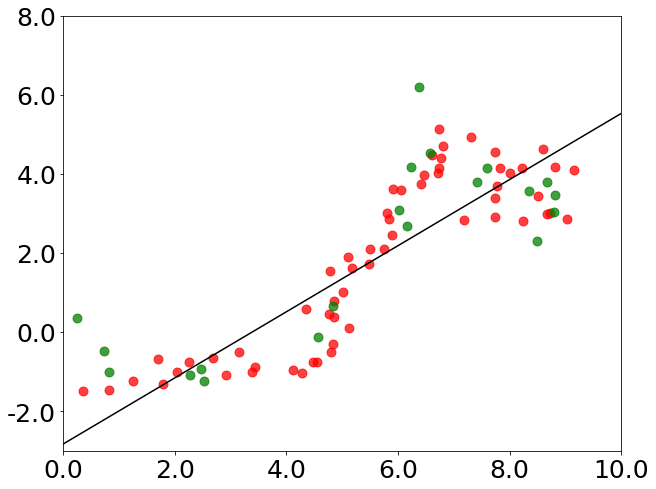

('Linear Regression Coefficients: ', array([[-2.82765049,  0.83606916]]))
('Mean Square Error of Test Data: ', 2.2423492030101246)
('Mean Square Error of Training Data: ', 1.127711955609391)
Problem 1, part 3-------------------------------


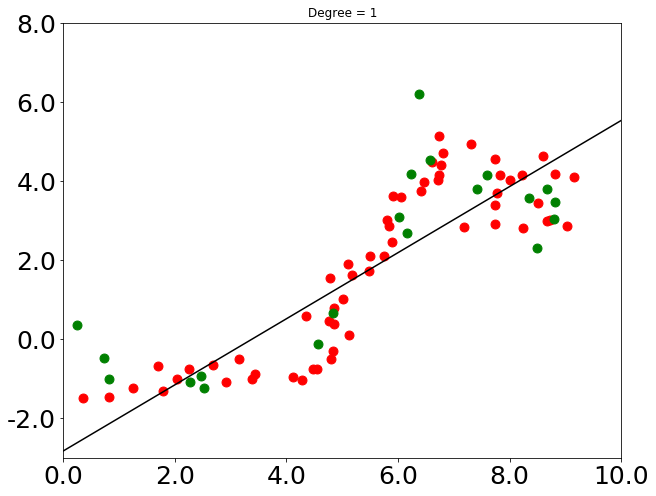

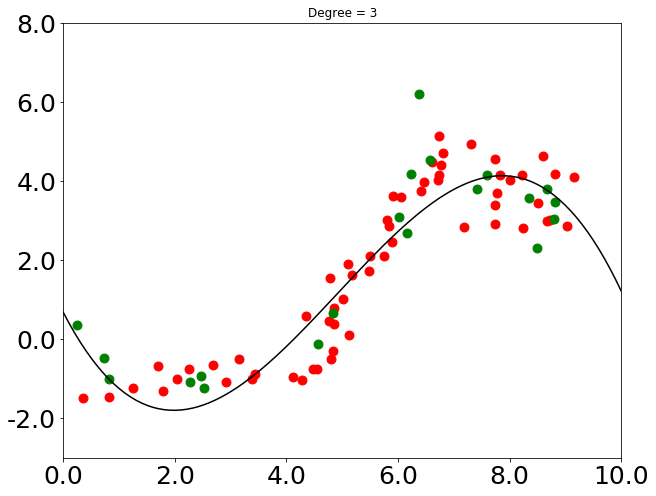

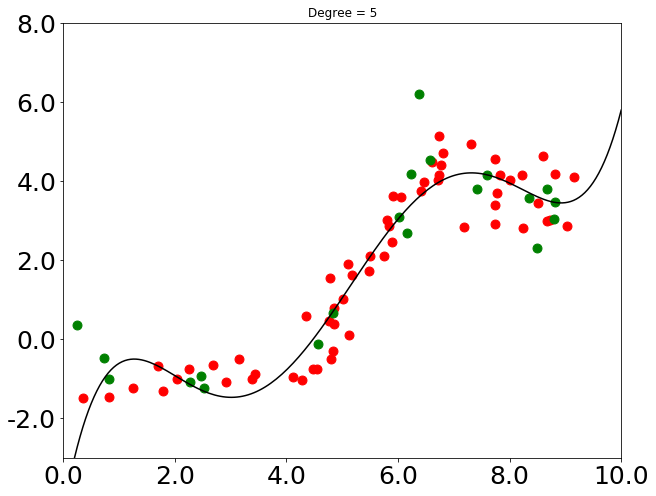

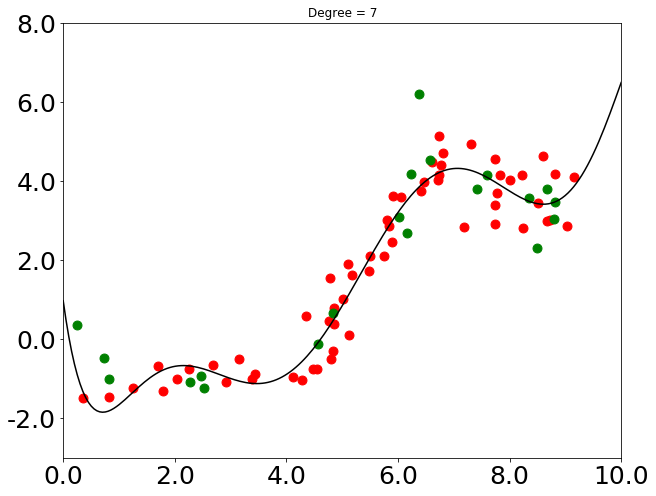

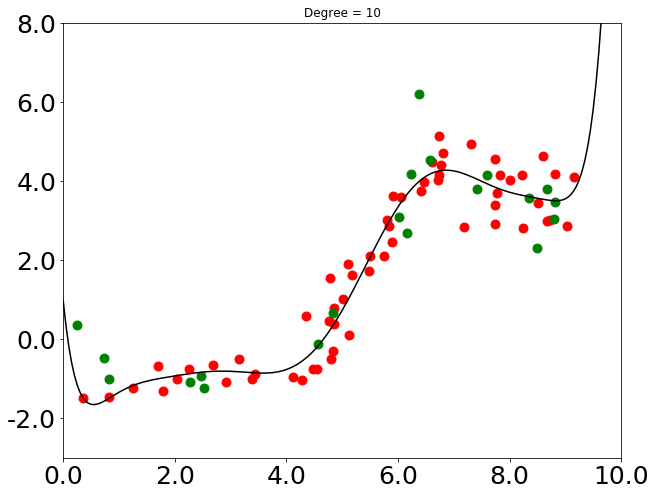

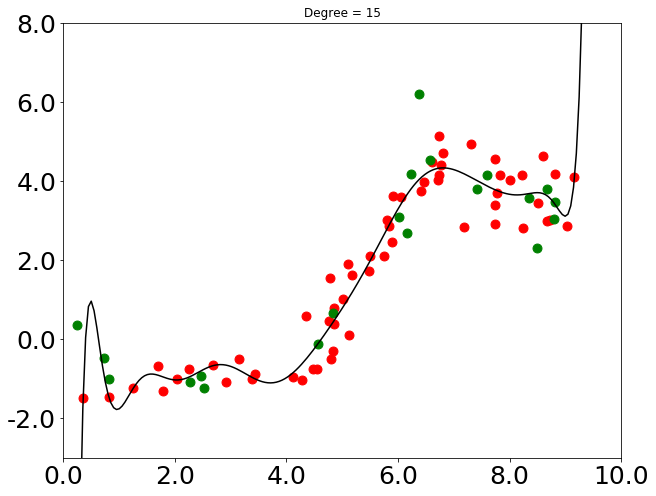

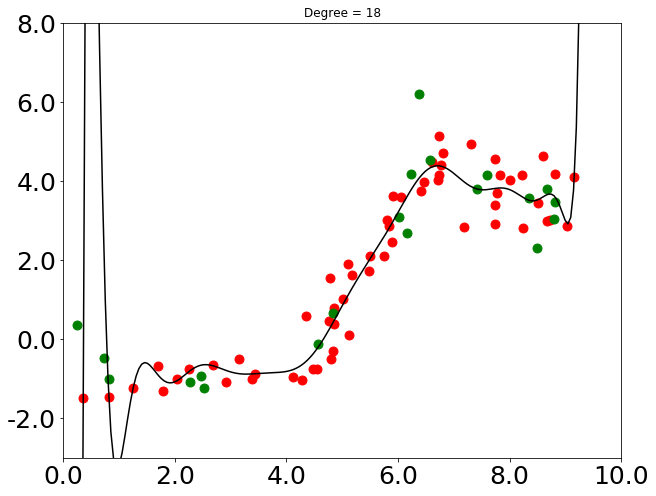

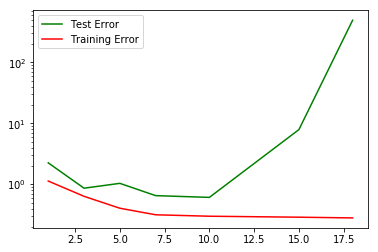

The degree 10 has lowest validation error, so we recommend this polynomials.


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("/Users/ding/Desktop/CS178/178-hw2-code/data/curve80.txt",delimiter=None) 
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print('Problem 1, part 1-------------------------------')
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

print('Problem 1, part 2-------------------------------')
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict( xs )

# Green = Test Data, Red = Training Data
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax.scatter(Xtr,Ytr,s=80,color = "red", alpha=0.75,label='Train')
ax.scatter(Xte,Yte,s=80,color = "green",alpha=0.75, label='Test')
ax.plot(xs,ys,color='black',label='prediction')
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25)  
ax = plt.axis()
plt.show()

print("Linear Regression Coefficients: ",lr.theta)

print("Mean Square Error of Test Data: ", lr.mse(Xte,Yte))
print("Mean Square Error of Training Data: ", lr.mse(Xtr,Ytr))

print('Problem 1, part 3-------------------------------')
degrees = [1,3,5,7,10,15,18]
errTest = []
errTrain = []


for degree in degrees:
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,False),params)[0]
    
    lr = ml.linear.linearRegress( XtrP, Ytr )
    
    YhatTrain = lr.predict(Phi(xs))
    YhatTest = lr.predict(Phi(Xte))
    
    f, ax = plt.subplots(1, 1, figsize=(10,8))
    ax.scatter(Xtr,Ytr,s=80,color = "red")
    ax.scatter(Xte,Yte,s=80,color = "green")
    ax.plot(xs,YhatTrain,color='black')
    plt.title("Degree = "+str(degree))
    ax.set_xlim(0, 10)
    ax.set_ylim(-3, 8)
    ax.set_xticklabels(ax.get_xticks(), fontsize=25)
    ax.set_yticklabels(ax.get_yticks(), fontsize=25)  
    ax = plt.axis()
    plt.show()
    
    
    errTest.append(lr.mse(Phi(Xte),Yte))
    errTrain.append(lr.mse(Phi(Xtr),Ytr))
    
plt.semilogy(degrees,errTest,'g-',degrees,errTrain,'r-')
plt.legend(['Test Error','Training Error'])
plt.show()
print('The degree 10 has lowest validation error, so we recommend this polynomials.')

Problem 2, part 1-------------------------------


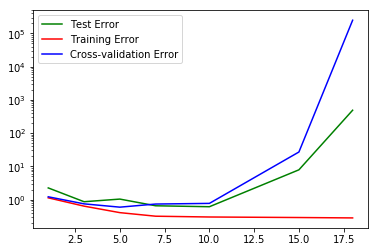

Problem 2, part 2-------------------------------
The Cross-validation error line is similar to the Test Error line.
when the degree getting higher, the error become larger
Problem 2, part 3-------------------------------
from the graph, I recommend degree 5 
Problem 2, part 4-------------------------------


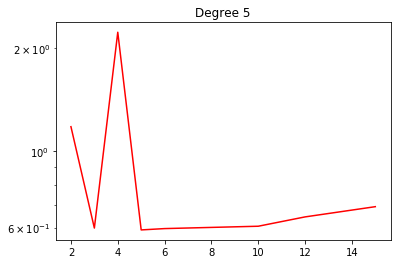

When the folds getting larger, the error becomes lower.
I think why this occur is that when we increase the train data, the folds is incresed too.


In [117]:
print('Problem 2, part 1-------------------------------')
def val_err(nFolds, degree):
    err = np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        
        XtiP = ml.transforms.fpoly(Xti, d, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)
        Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,d,False),params)[0]
        
        learner = ml.linear.linearRegress( Phi(Xti), Yti)
        
        err[iFold] = learner.mse(Phi(Xvi), Yvi)
    return np.mean(err)

nFolds = 5
errX = np.zeros(len(degrees))

for i,d in enumerate(degrees):
    errX[i] = val_err(nFolds, d)
    
plt.semilogy(degrees,errTest,'g-',degrees,errTrain,'r-', degrees, errX, 'b')
plt.legend(['Test Error','Training Error','Cross-validation Error'])
plt.show()
print('Problem 2, part 2-------------------------------')
print('The Cross-validation error line is similar to the Test Error line.')
print('when the degree getting higher, the error become larger')


print('Problem 2, part 3-------------------------------')
print('from the graph, I recommend degree 5 ')

print('Problem 2, part 4-------------------------------')
# I pick degree 5
d = 5
nFolds = [2,3,4,5,6,10,12,15]
err = [0,0,0,0,0,0,0,0]
for i,folds in enumerate(nFolds):
    err[i] = val_err(folds,d)
plt.semilogy(nFolds,err,'r-')
plt.title('Degree 5')
plt.show()
print('When the folds getting larger, the error becomes lower.')
print('I think why this occur is that when we increase the train data, the folds is incresed too.')

In [115]:
print('Statement of Collaboration： ')
print('Before starting homework, I study the disscusion. and also look at piazza')

Statement of Collaboration： 
Before starting homework, I study the disscusion. and also look at piazza
